In [1]:
path = "/Users/yhra/Documents/Master/Semester_3/MLFMM/UE/05/PSet05_files/"
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, LinearRegression

# Task 1 - Noise Linear Regression



In [2]:
# Load the data
X_test = np.load(path + "X_test.npy")
y_test = np.load(path + "y_test.npy")
X_train = np.load(path + "X_train.npy")
y_train = np.load(path + "y_train.npy")

linear = LinearRegression()
ridge = Ridge(alpha=5, random_state=42, max_iter=1000)
lasso = Lasso(alpha=5, random_state=42, max_iter=1000)


Train a standard SGD Regression using Scikit

In [3]:
max_inter = 1000
linear.max_iter = max_inter
ridge.max_iter = max_inter
lasso.max_iter = max_inter

linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

pred_linear = linear.predict(X_test)
print(f"Train of R2 score of the standard SGD Regression: {np.round(linear.score(X_train, y_train), 2)}")
pred_ridge = ridge.predict(X_test)
print(f"Train of R2 score of the Ridge Regression: {np.round(ridge.score(X_train, y_train), 2)}")
pred_lasso = lasso.predict(X_test)
print(f"Train of R2 score of the Lasso Regression: {np.round(lasso.score(X_train, y_train), 2)}")

print(f"The R2 score of the standard SGD Regression is {np.round(linear.score(X_test, y_test), 2)}")
print(f"The R2 score of the Ridge Regression is {np.round(ridge.score(X_test, y_test), 2)}")
print(f"The R2 score of the Lasso Regression is {np.round(lasso.score(X_test, y_test), 2)}") 



Train of R2 score of the standard SGD Regression: 1.0
Train of R2 score of the Ridge Regression: 0.95
Train of R2 score of the Lasso Regression: 0.94
The R2 score of the standard SGD Regression is -1039.16
The R2 score of the Ridge Regression is -13.73
The R2 score of the Lasso Regression is -6.78


In [4]:
# Get MAE, RMSE, MAPE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f"The MAE of the standard SGD Regression is {mean_absolute_error(y_test, pred_linear)}")
print(f"The MAE of the Ridge Regression is {mean_absolute_error(y_test, pred_ridge)}")
print(f"The MAE of the Lasso Regression is {mean_absolute_error(y_test, pred_lasso)}\n")


print(f"The RMSE of the standard SGD Regression is {np.sqrt(mean_squared_error(y_test, pred_linear))}")
print(f"The RMSE of the Ridge Regression is {np.sqrt(mean_squared_error(y_test, pred_ridge))}")
print(f"The RMSE of the Lasso Regression is {np.sqrt(mean_squared_error(y_test, pred_lasso))}\n")


print(f"The MAPE of the standard SGD Regression is {np.mean(np.abs((y_test - pred_linear) / y_test))}")
print(f"The MAPE of the Ridge Regression is {np.mean(np.abs((y_test - pred_ridge) / y_test))}")
print(f"The MAPE of the Lasso Regression is {np.mean(np.abs((y_test - pred_lasso) / y_test))}")


The MAE of the standard SGD Regression is 71.5512292350263
The MAE of the Ridge Regression is 9.003045507398673
The MAE of the Lasso Regression is 6.492290176826472

The RMSE of the standard SGD Regression is 77.76535358451557
The RMSE of the Ridge Regression is 9.254941690803626
The RMSE of the Lasso Regression is 6.725865715249051

The MAPE of the standard SGD Regression is 100.6921078041971
The MAPE of the Ridge Regression is 13.250295477571768
The MAPE of the Lasso Regression is 9.649426114108271


# Task 2 - Linear Regression
This problem focuses on fitting the solubility column from the solubility_dataset.csv.

## Data preprocessing

In [5]:
import pandas as pd
df = pd.read_csv(path + "solubility_dataset.csv")

# Drop columns that are text
df = df.drop(columns=["Name", "InChIKey", "InChI", "SMILES", 'ID', 'Group'])

# Create new Column with the values of the solubility and call it y
y = df.Solubility
# add the column to the dataframe
df['Labels'] = y
df.drop(columns=['Solubility'], inplace=True)

all = []
for index, row in df.iterrows():
    row = []
    for column in df.columns:
        if column != 'Labels':
            row.append(df.at[index, column])
    all.append(row)

df['Features'] = all
# print the lenght of a feature vector
print(f"The length of a feature vector is {len(df.at[0, 'Features'])}")
df.head()


The length of a feature vector is 19


,SD,Ocurrences,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,...,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT,Labels,Features
0,0.0,1,392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,...,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334,-3.616127,"[0.0, 1, 392.5100000000002, 3.9581000000000017..."
1,0.0,1,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,...,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248,-3.254767,"[0.0, 1, 169.18299999999996, 2.405500000000001..."
2,0.0,1,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,...,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065,-2.177078,"[0.0, 1, 140.569, 2.1525, 36.839500000000015, ..."
3,0.0,1,756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,...,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666,-3.924409,"[0.0, 1, 756.2260000000002, 8.11610000000001, ..."
4,0.0,1,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,...,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934,-4.662065,"[0.0, 1, 422.5250000000002, 2.4854000000000003..."


Now we are ready to split the data into training and testing sets.
Also we will standardize the data because the features have different scales.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df['Features']
X = np.array([np.array(x) for x in X])
y = df['Labels'].to_numpy()
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize the features (X)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Standardize the labels (y)
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = y_scaler.transform(y_test.reshape(-1, 1)).ravel()

# find the mean of the normalized X_test matrix
print(f"The mean of the normalized X_test matrix is {np.round(np.mean(X_test), 3)}")



(9982, 19)
(9982,)
The mean of the normalized X_test matrix is 0.014


## Train the models

In [7]:
max_inter = 1000
# initialize the model
linear = LinearRegression()
ridge = Ridge(alpha=10, random_state=42)
lasso = Lasso(alpha=1, random_state=42)

# set the max_iter
linear.max_iter = max_inter
ridge.max_iter = max_inter
lasso.max_iter = max_inter

# Train the model
linear.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Get the predictions
pred_linear = linear.predict(X_test)
pred_ridge = ridge.predict(X_test)
pred_lasso = lasso.predict(X_test)

# Force into 1D array
y_test = y_test.reshape(-1, 1)
pred_linear = pred_linear.reshape(-1, 1)
pred_ridge = pred_ridge.reshape(-1, 1)
pred_lasso = pred_lasso.reshape(-1, 1)

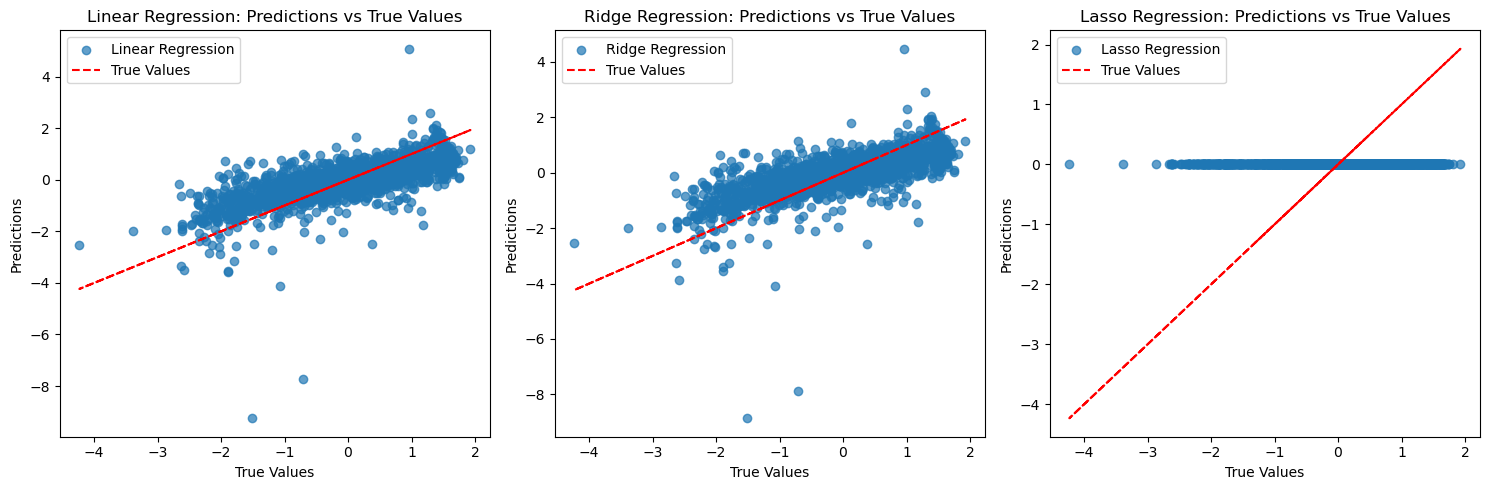

In [8]:
# Create 3 separate plots for each regression model
plt.figure(figsize=(15, 5))

# Linear Regression plot
plt.subplot(131)
plt.scatter(y_test, pred_linear, label="Linear Regression", alpha=0.7)
plt.plot(y_test, y_test, label="True Values", linestyle="--", color='red')
plt.title("Linear Regression: Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()

# Ridge Regression plot
plt.subplot(132)
plt.scatter(y_test, pred_ridge, label="Ridge Regression", alpha=0.7)
plt.plot(y_test, y_test, label="True Values", linestyle="--", color='red')
plt.title("Ridge Regression: Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()

# Lasso Regression plot
plt.subplot(133)
plt.scatter(y_test, pred_lasso, label="Lasso Regression", alpha=0.7)
plt.plot(y_test, y_test, label="True Values", linestyle="--", color='red')
plt.title("Lasso Regression: Predictions vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend()

plt.tight_layout()
plt.show()


## Compute the R2 score, MAE, RMSE, MAPE, Peason R  and Spearman R

In [9]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy import stats
import numpy as np

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for each model
metrics = {}
for name, pred in [("Linear", pred_linear), ("Ridge", pred_ridge), ("Lasso", pred_lasso)]:
    metrics[name] = {
        "R2 Score": round(r2_score(y_test, pred), 3),
        "MAE": round(mean_absolute_error(y_test, pred), 3),
        "RMSE": round(np.sqrt(mean_squared_error(y_test, pred)), 3),
        "MAPE": round(mape(y_test, pred), 3),
        "Pearson R": round(stats.pearsonr(y_test.ravel(), pred.ravel())[0], 3),
        "Spearman R": round(stats.spearmanr(y_test.ravel(), pred.ravel())[0], 3)
    }

# Print metrics in a formatted table
print("Metric        Linear     Ridge      Lasso      Ideal")
print("-" * 55)
ideal_values = {
    "R2 Score": 1.0,
    "MAE": 0.0,
    "RMSE": 0.0, 
    "MAPE": 0.0,
    "Pearson R": 1.0,
    "Spearman R": 1.0
}
for metric in ["R2 Score", "MAE", "RMSE", "MAPE", "Pearson R", "Spearman R"]:
    print(f"{metric:<12} {metrics['Linear'][metric]:>9.3f} {metrics['Ridge'][metric]:>9.3f} {metrics['Lasso'][metric]:>9.3f} {ideal_values[metric]:>9.1f}")


Metric        Linear     Ridge      Lasso      Ideal
-------------------------------------------------------
R2 Score         0.500     0.504    -0.000       1.0
MAE              0.507     0.505     0.789       0.0
RMSE             0.693     0.690     0.980       0.0
MAPE           212.625   202.502   100.000       0.0
Pearson R        0.710     0.711       nan       1.0
Spearman R       0.755     0.761       nan       1.0


/var/folders/yv/1fmjzcsn6xs23xrlfnvvd82w0000gn/T/ipykernel_81104/4062479311.py:17: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "Pearson R": round(stats.pearsonr(y_test.ravel(), pred.ravel())[0], 3),
/var/folders/yv/1fmjzcsn6xs23xrlfnvvd82w0000gn/T/ipykernel_81104/4062479311.py:18: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  "Spearman R": round(stats.spearmanr(y_test.ravel(), pred.ravel())[0], 3)


## Find the feature with the biggest absolute value

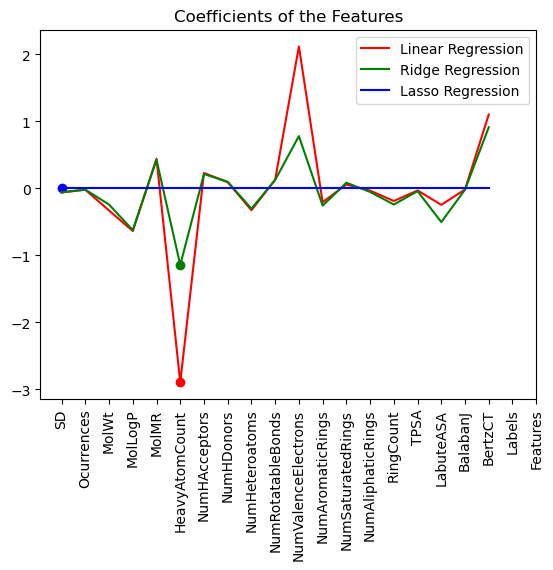

In [10]:
# Plot the coefficients of the models
plt.plot(linear.coef_, label="Linear Regression", color="red")
plt.plot(ridge.coef_, label="Ridge Regression", color="green")
plt.plot(lasso.coef_, label="Lasso Regression", color="blue")
# mark the feature with the biggest absolute value
plt.scatter(np.argmax(np.abs(linear.coef_)), linear.coef_[np.argmax(np.abs(linear.coef_))], color="red")
plt.scatter(np.argmax(np.abs(ridge.coef_)), ridge.coef_[np.argmax(np.abs(ridge.coef_))], color="green")
plt.scatter(np.argmax(np.abs(lasso.coef_)), lasso.coef_[np.argmax(np.abs(lasso.coef_))], color="blue")
# use the name of the features as x-axis
plt.xticks(np.arange(len(df.columns)), df.columns, rotation=90)
plt.title("Coefficients of the Features")
plt.legend()
plt.show()





# Task 3 - Is it FDA approved?

## Data preprocessing

In [11]:
df = pd.read_csv(path + "toxicology.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   smiles        1484 non-null   object
 1   FDA_APPROVED  1484 non-null   int64 
 2   CT_TOX        1484 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 34.9+ KB


In [12]:
# add a column with the desciptors of the molecule
from rdkit.Chem import AllChem
fpgen = AllChem.GetRDKitFPGenerator()
mols = [AllChem.MolFromSmiles(smiles) for smiles in df['smiles']]
df['mols'] = mols

# delete rows where mols is None
df = df[df['mols'].notna()]

# generate the descriptors
descriptors = [fpgen.GetFingerprint(mol) for mol in df['mols']]
df['features'] = descriptors
df.info()

features_array = np.array([np.array(x) for x in df['features']])
print(f"The shape of the features array is {features_array.shape}")
print(f"The product of #features and #samples is {features_array.shape[0] * features_array.shape[1]}")

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_array, df['FDA_APPROVED'], test_size=0.2, random_state=42)


[16:01:54] Explicit valence for atom # 0 N, 5, is greater than permitted
[16:01:54] Can't kekulize mol.  Unkekulized atoms: 9
[16:01:54] Can't kekulize mol.  Unkekulized atoms: 4
[16:01:54] Can't kekulize mol.  Unkekulized atoms: 4


<class 'pandas.core.frame.DataFrame'>
Index: 1480 entries, 0 to 1483
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   smiles        1480 non-null   object
 1   FDA_APPROVED  1480 non-null   int64 
 2   CT_TOX        1480 non-null   int64 
 3   mols          1480 non-null   object
 4   features      1480 non-null   object
dtypes: int64(2), object(3)
memory usage: 69.4+ KB
The shape of the features array is (1480, 2048)
The product of #features and #samples is 3031040


## Train a Logistic Regression model

- Get the accuracy of the model (TP + TN) / (TP + TN + FP + FN)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Get the accuracy of the model
acc = accuracy_score(y_test, LogReg.predict(X_test))
print(f"The accuracy of the model is {np.round(acc, 3)}")


The accuracy of the model is 0.912


## Train a naiv model

- always predicts the same result (the one that is more common)


In [14]:
# find the most common result
most_common = df['FDA_APPROVED'].mode()[0]
print(f"The most common result is {most_common}")

# predict the test set
pred_naive = np.full(y_test.shape, most_common)

# calculate the accuracy of the naive model
naive_acc = accuracy_score(y_test, pred_naive)
print(f"The accuracy of the naive model is {np.round(naive_acc, 3)}")

The most common result is 1
The accuracy of the naive model is 0.946


## Compute metrics for the two models

- accuracy, precision, recall, F1 score, false positive rate, true negative rate and balanced accuracy

In [15]:
# Get the metrics for the Logistic Regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

def false_positive_rate(y_true, y_pred):
    return np.sum((y_true == 0) & (y_pred == 1)) / np.sum(y_true == 0)

def true_negative_rate(y_true, y_pred):
    return np.sum((y_true == 0) & (y_pred == 0)) / np.sum(y_true == 0)

def cohens_kappa(y_true, y_pred):
    # po = (TP+TN)/all 
    # pe = (TP+FP)(TP+FN) + (TN+FP)(TN+FN) / all^2
    po = (np.sum((y_true == y_pred) & (y_true == 1)) + np.sum((y_true == y_pred) & (y_true == 0))) / len(y_true)
    pe = (np.sum(y_true == 1) * np.sum(y_pred == 1) + np.sum(y_true == 0) * np.sum(y_pred == 0)) / len(y_true)**2
    return (po - pe) / (1 - pe)

# Get the metrics for the Logistic Regression model
acc_logreg = accuracy_score(y_test, LogReg.predict(X_test))
precision_logreg = precision_score(y_test, LogReg.predict(X_test))
recall_logreg = recall_score(y_test, LogReg.predict(X_test))
f1_logreg = f1_score(y_test, LogReg.predict(X_test))
false_positive_rate_logreg = false_positive_rate(y_test, LogReg.predict(X_test))
true_negative_rate_logreg = true_negative_rate(y_test, LogReg.predict(X_test))
balanced_accuracy_logreg = balanced_accuracy_score(y_test, LogReg.predict(X_test))
cohens_kappa_logreg = cohens_kappa(y_test, LogReg.predict(X_test))

# Get the metrics for the Naive model
acc_naive = accuracy_score(y_test, pred_naive)
precision_naive = precision_score(y_test, pred_naive)
recall_naive = recall_score(y_test, pred_naive)
f1_naive = f1_score(y_test, pred_naive)
false_positive_rate_naive = false_positive_rate(y_test, pred_naive)
true_negative_rate_naive = true_negative_rate(y_test, pred_naive)
balanced_accuracy_naive = balanced_accuracy_score(y_test, pred_naive)
cohens_kappa_naive = cohens_kappa(y_test, pred_naive)

# Create a table with the metrics and indicate better model with ✓
metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Model'],
    'Accuracy': [f"{acc_logreg:.3f} ✓" if acc_logreg > acc_naive else f"{acc_logreg:.3f}", 
                f"{acc_naive:.3f} ✓" if acc_naive >= acc_logreg else f"{acc_naive:.3f}"],
    'Precision': [f"{precision_logreg:.3f} ✓" if precision_logreg > precision_naive else f"{precision_logreg:.3f}",
                 f"{precision_naive:.3f} ✓" if precision_naive >= precision_logreg else f"{precision_naive:.3f}"],
    'Recall': [f"{recall_logreg:.3f} ✓" if recall_logreg > recall_naive else f"{recall_logreg:.3f}",
              f"{recall_naive:.3f} ✓" if recall_naive >= recall_logreg else f"{recall_naive:.3f}"],
    'F1 Score': [f"{f1_logreg:.3f} ✓" if f1_logreg > f1_naive else f"{f1_logreg:.3f}",
                f"{f1_naive:.3f} ✓" if f1_naive >= f1_logreg else f"{f1_naive:.3f}"],
    'FPR': [f"{false_positive_rate_logreg:.3f} ✓" if false_positive_rate_logreg < false_positive_rate_naive else f"{false_positive_rate_logreg:.3f}",
           f"{false_positive_rate_naive:.3f} ✓" if false_positive_rate_naive <= false_positive_rate_logreg else f"{false_positive_rate_naive:.3f}"],
    'TNR': [f"{true_negative_rate_logreg:.3f} ✓" if true_negative_rate_logreg > true_negative_rate_naive else f"{true_negative_rate_logreg:.3f}",
           f"{true_negative_rate_naive:.3f} ✓" if true_negative_rate_naive >= true_negative_rate_logreg else f"{true_negative_rate_naive:.3f}"],
    'Balanced Accuracy': [f"{balanced_accuracy_logreg:.3f} ✓" if balanced_accuracy_logreg > balanced_accuracy_naive else f"{balanced_accuracy_logreg:.3f}",
                        f"{balanced_accuracy_naive:.3f} ✓" if balanced_accuracy_naive >= balanced_accuracy_logreg else f"{balanced_accuracy_naive:.3f}"],
    'Cohens Kappa': [f"{cohens_kappa_logreg:.3f} ✓" if cohens_kappa_logreg > cohens_kappa_naive else f"{cohens_kappa_logreg:.3f}",
                    f"{cohens_kappa_naive:.3f} ✓" if cohens_kappa_naive >= cohens_kappa_logreg else f"{cohens_kappa_naive:.3f}"]
})

# Display the table with nice formatting
print(metrics.to_string(index=False, justify='center'))


       Model        Accuracy Precision  Recall F1 Score   FPR     TNR   Balanced Accuracy Cohens Kappa
Logistic Regression   0.912   0.950 ✓    0.957   0.954  0.875 ✓ 0.125 ✓      0.541 ✓        0.087 ✓   
        Naive Model 0.946 ✓     0.946  1.000 ✓ 0.972 ✓    1.000   0.000        0.500          0.000   


## Get the ROC curve and AUC

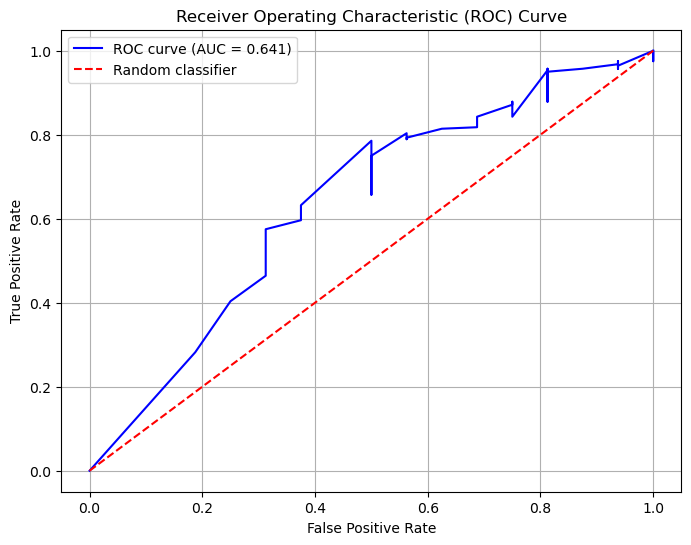


AUC: 0.641
The AUC is bigger than 0.5


In [16]:
# Get probabilities for positive class (approved)
probs = LogReg.predict_proba(X_test)[:, 1]

# Create threshold values
thresholds = np.linspace(0.0, 1.0, 2001)

# Initialize lists to store FPR and TPR values
fprs = []
tprs = []

# Calculate FPR and TPR for each threshold
for threshold in thresholds:
    # Convert probabilities to predictions based on threshold
    y_pred = (probs >= threshold).astype(int)
    
    # Calculate metrics
    fpr = false_positive_rate(y_test, y_pred)
    tpr = recall_score(y_test, y_pred)  # TPR is same as recall
    
    fprs.append(fpr)
    tprs.append(tpr)

# Convert to numpy arrays for easier manipulation
fprs = np.array(fprs)
tprs = np.array(tprs)

# Sort by FPR
sort_idx = np.argsort(fprs)
fprs = fprs[sort_idx]
tprs = tprs[sort_idx]

# Calculate AUC using trapezoidal rule
auc = np.trapz(y=tprs, x=fprs)

# Create ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, 'b-', label=f'ROC curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nAUC: {auc:.3f}")
print(f"The AUC is {'bigger' if auc > 0.5 else 'smaller'} than 0.5")
